Problem Statement:

Refer to the car evaluation dataset. Apply appropriate EDA methods wherever required and perform feature engineering. Construct a model using a decision tree. Analyze the performance of the model with suitable evaluation measures.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
data=pd.read_csv("C:/M.sc Data Science clg/DS SEM 2/ML Assignments/Assignment no 5 dt/car_evaluation.csv")
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


# Perform EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
data.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,4,4,big,high,unacc
freq,432,432,432,576,576,576,1209


In [5]:
data.shape

(1727, 7)

In [6]:
data.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [7]:
data.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [8]:
# Renaming Columns

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns.

In [9]:
col_names = ['BuyingPrice', 'MaintenanceCost', 'num_Doors', 'num_persons', 'lug_boot', 'safety', 'decision']

data.columns = col_names

In [10]:
data.head()

,BuyingPrice,MaintenanceCost,num_Doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   BuyingPrice      1727 non-null   object
 1   MaintenanceCost  1727 non-null   object
 2   num_Doors        1727 non-null   object
 3   num_persons      1727 non-null   object
 4   lug_boot         1727 non-null   object
 5   safety           1727 non-null   object
 6   decision         1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
data["decision"].value_counts() # Here decision is the our output variable

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

<AxesSubplot:xlabel='decision', ylabel='count'>

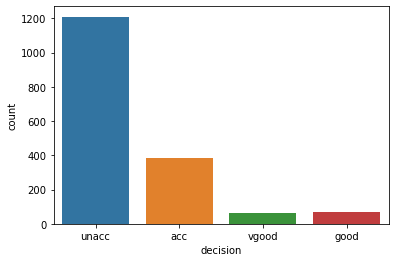

In [13]:
sns.countplot(data['decision'])

<AxesSubplot:xlabel='decision', ylabel='count'>

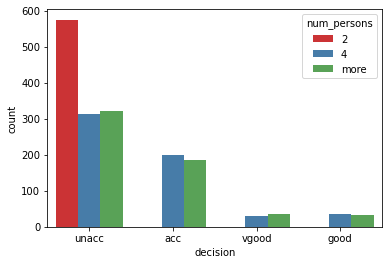

In [14]:
sns.countplot(x = 'decision', hue = 'num_persons', data =data, palette = "Set1")

Here we can take a note for decision is 'good' and 'vgood' when person is more than 2

<AxesSubplot:xlabel='decision', ylabel='count'>

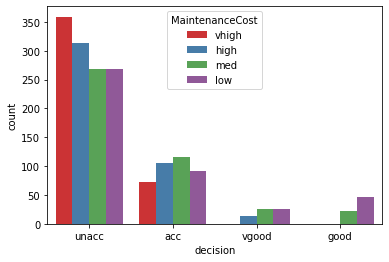

In [15]:
sns.countplot(x = 'decision', hue = 'MaintenanceCost', data =data, palette = "Set1")

For car to evaluate to good and vgood Maintenance cost should not be very high

# Declaring predictor variables and target variable

In [16]:
X = data.drop(['decision'], axis=1)
y = data['decision']

In [17]:
X.dtypes

BuyingPrice        object
MaintenanceCost    object
num_Doors          object
num_persons        object
lug_boot           object
safety             object
dtype: object

# Applying encoding to categorical variable

In [37]:
#!pip install category_encoders 

In [19]:
import category_encoders as ce
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['BuyingPrice', 'MaintenanceCost', 'num_Doors', 'num_persons', 'lug_boot', 'safety'])


X = encoder.fit_transform(X)
# fit_transform will perform both .fit() and .transform() is done for testing, fit_transform done for traning

In [20]:
X

,BuyingPrice,MaintenanceCost,num_Doors,num_persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,2,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1722,4,4,4,3,2,1
1723,4,4,4,3,2,2
1724,4,4,4,3,3,3
1725,4,4,4,3,3,1


# Split Data - Training and Testing

In [21]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1381, 6), (346, 6))

# Decision Tree Classifier Criterion Entropy

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)
#fit the model
#entropy means it helps to measure the purity of split.
#we have to calculate purity of this particular split every time in each and every node so for that we use entropy
clf_entropy.fit(X_train, y_train) # fit used to find parameter like mean,sd. fit is used for training data

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [24]:
y_pred_en = clf_entropy.predict(X_test) # predict used for train or new data

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
#Checking Accuracy on testing data
accuracy_score(y_test,y_pred_en)

0.8208092485549133

In [27]:
y_pred_train_en = clf_entropy.predict(X_train)

In [28]:
#Checking Accuracy on training data
accuracy_score(y_train,y_pred_train_en)

0.7842143374366402

# Evaluating Model

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [30]:
# Classification report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

         acc       0.59      0.62      0.61        77
        good       0.00      0.00      0.00        14
       unacc       0.89      0.99      0.94       239
       vgood       0.00      0.00      0.00        16

    accuracy                           0.82       346
   macro avg       0.37      0.40      0.39       346
weighted avg       0.75      0.82      0.78       346



In [31]:
#Confusion matrix
confusion_matrix(y_test, y_pred_en)

array([[ 48,   0,  29,   0],
       [ 14,   0,   0,   0],
       [  3,   0, 236,   0],
       [ 16,   0,   0,   0]], dtype=int64)

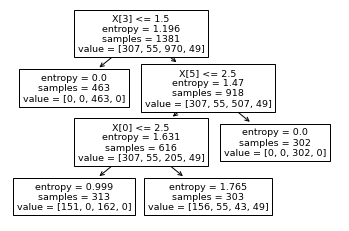

In [43]:
import sklearn.tree as tree
tree.plot_tree(clf_entropy)
plt.show()

In [34]:
!pip install pydot
!pip install graphviz

In [40]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(X)

In [41]:
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

# Conclusion

Built a model with Decision Tree classifier with entropy to predict safety of the car and the model has a good perfomance with a accuracy score of .79 and the model is not suffering from overfitting